In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Pre-processing

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Display basic information
print(insurance_data.info())
# Display summary statistics
print(insurance_data.describe())
# Check for missing values
print(insurance_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [5]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print(insurance_data.shape)

(1338, 7)


In [7]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
insurance_data.drop_duplicates(keep='first', inplace=True)

# Modeling

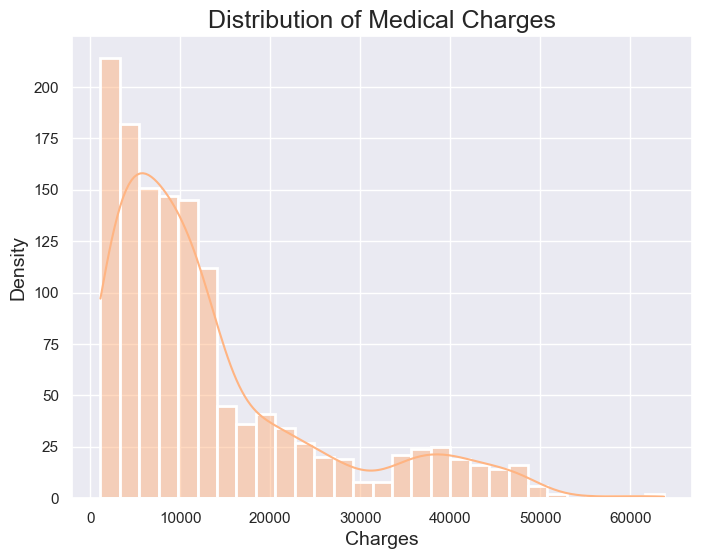

In [9]:
plt.figure(figsize=(8, 6))  
sns.set(style="darkgrid")  

custom_palette = sns.color_palette("pastel", 3)

sns.histplot(insurance_data['charges'], kde=True, color=custom_palette[1], linewidth=2)

plt.title('Distribution of Medical Charges', size=18)
plt.xlabel('Charges', size=14)
plt.ylabel('Density', size=14)

plt.show()

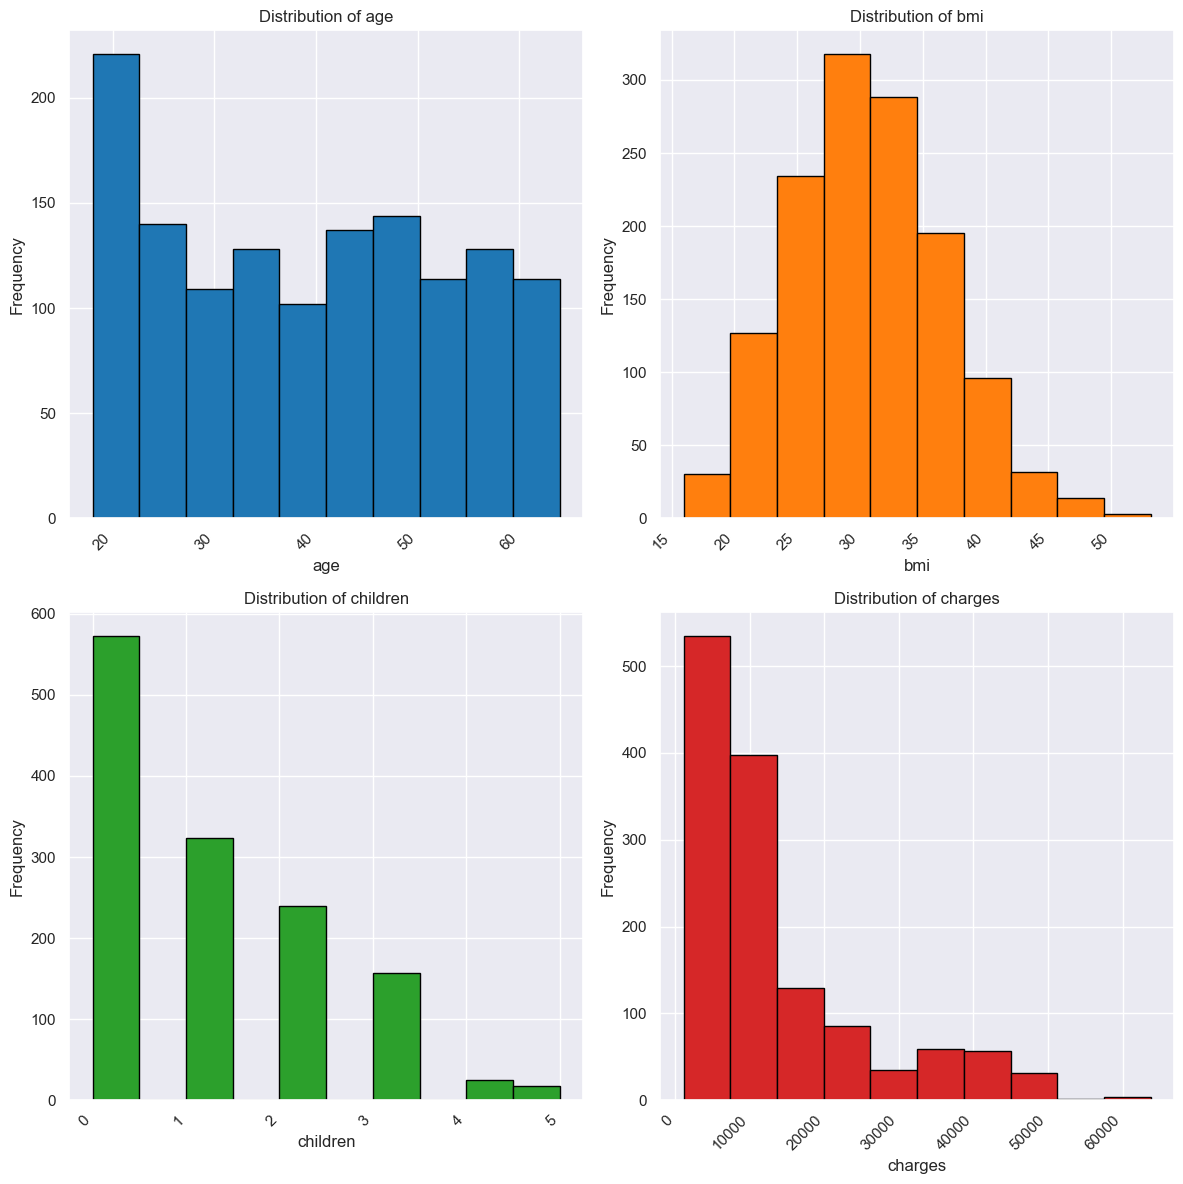

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Number of rows and columns in subplots
num_rows = 2
num_cols = 2

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Iterate over each column and plot each histogram with different color
for i, column in enumerate(insurance_data.select_dtypes(include=['float64', 'int64']).columns[:4]):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(insurance_data[column], bins=10, color=colors[i], edgecolor='black')  # Custom color and bin count
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


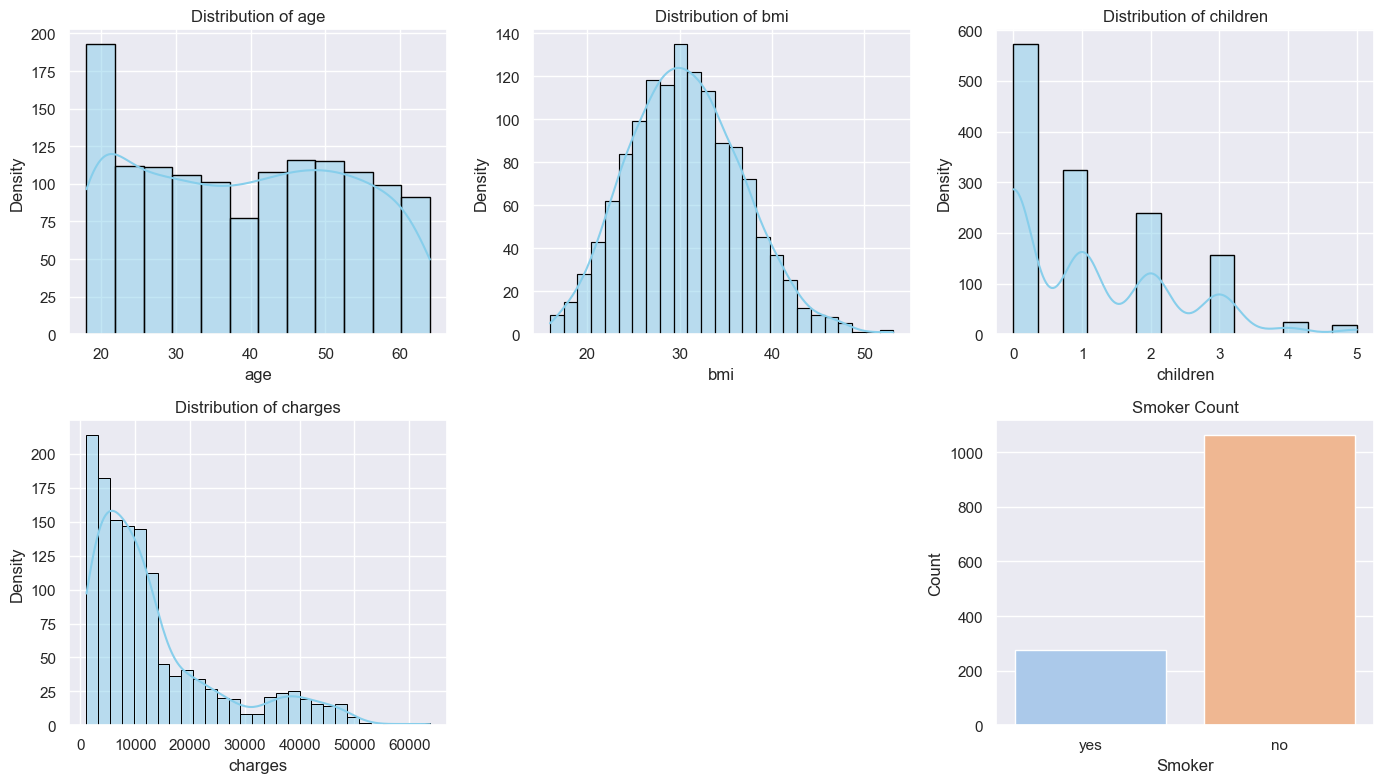

In [11]:
# I had chat gpt help me with this recreation of my modeling examples to give it more depth and 
# visual aspects that I could not acheieve on my own
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = (len(insurance_data.select_dtypes(include=['float64', 'int64']).columns)) // num_rows + 1

# Set up the figure
plt.figure(figsize=(14, 8))

# Loop through each numerical column and create a histogram
for i, column in enumerate(insurance_data.select_dtypes(include=['float64', 'int64'])):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=insurance_data, x=column, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Add a categorical plot for the 'smoker' variable
plt.subplot(num_rows, num_cols, num_rows * num_cols)
sns.countplot(data=insurance_data, x='smoker', palette='pastel')
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [12]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

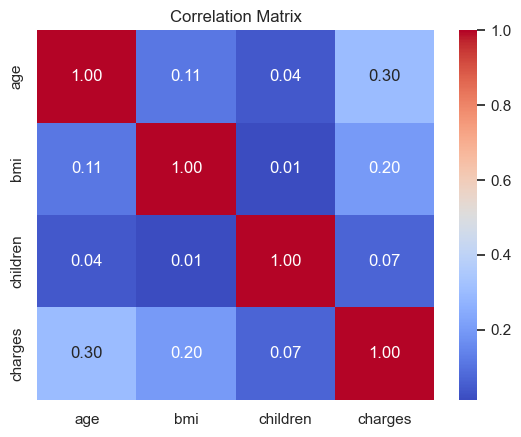

In [13]:
# This does not include non-numeric columns before calculating the correlation matrix
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = insurance_data[numeric_columns].corr()

# Visualize correlation between numerical features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Experiment 1

In [14]:
# Feature engineering: Convert categorical variables into numerical using one-hot encoding
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the charges on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 4702.4462291546515


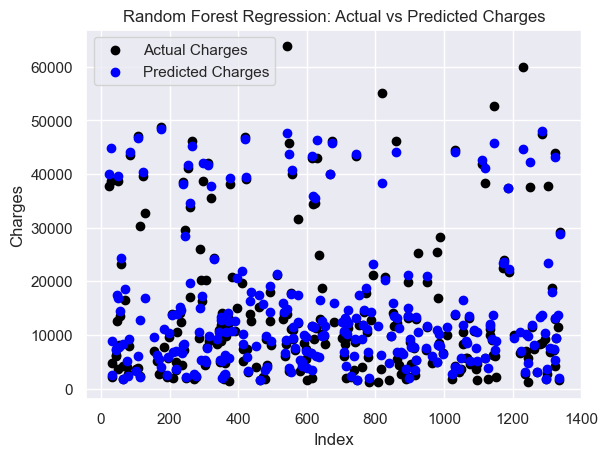

In [15]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X_test.index, y_test, color="black", label='Actual Charges')
plt.scatter(X_test.index, y_pred, color="blue", label='Predicted Charges')

plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Random Forest Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()


# Experiment 2

In [16]:
# Select independent variables X and dependent variable Y
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

# Here I also used chat gpt I kept getting errors without using a "ColumnTransformer" and this debug fix was to use it!
# One-hot encode categorical variables
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'])], 
    remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model1 = LinearRegression()

# Train the model using the training sets
model1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model1.predict(X_test)

# Evaluate the model
print("Experiment 2 Results:")
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))


Experiment 2 Results:
Root Mean Squared Error: 5956.342894363581


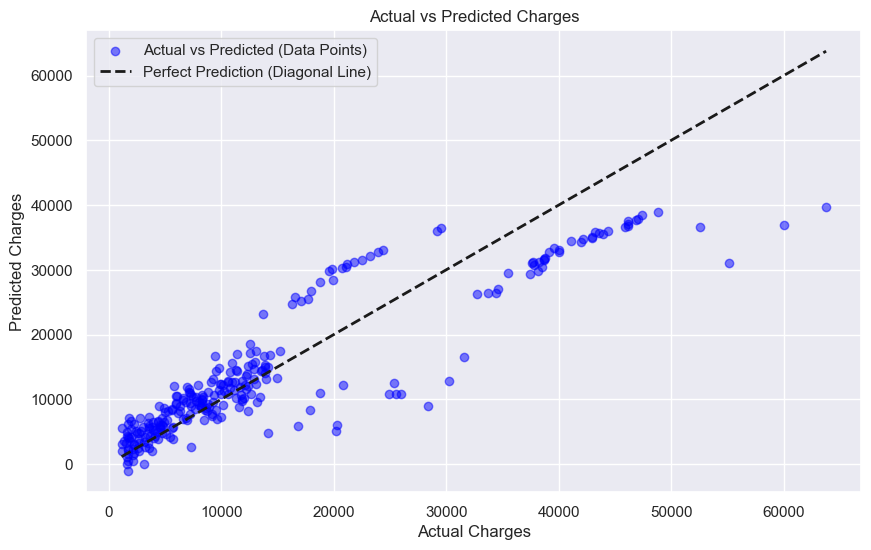

In [17]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted (Data Points)')  # Blue circles
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction (Diagonal Line)')  # Diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

# Add legend
plt.legend()

plt.show()


# Experiment 3

In [18]:
# Select independent variables X and target(dependent variable) Y
X = insurance_data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                    'region_northwest', 'region_southeast', 'region_southwest']]
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model2 = DecisionTreeRegressor()

# Train the model using the training sets
model2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model2.predict(X_test)

# Print evaluation metrics
print("Experiment 3 Results:")

print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))



Experiment 3 Results:
Root Mean squared error: 5875.13


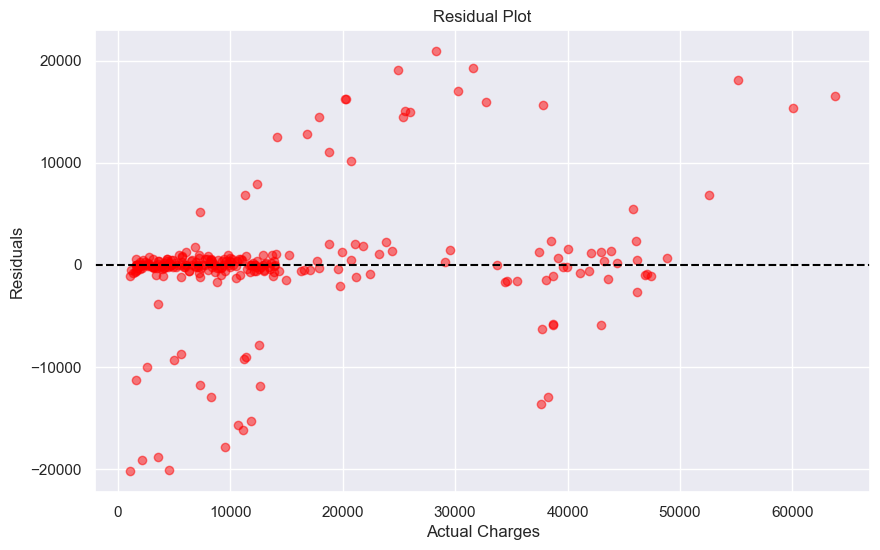

In [19]:
#I ran out of visual Ideas and used chat gpt to genrate a Residual plot just to give a differnt outlook of visuals
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
